In [ ]:
!pip install selectivesearch
!pip install torch_snippets

In [ ]:
import selectivesearch
from skimage.segmentation import felzenszwalb
from torch_snippets import *

In [ ]:
import urllib.request 

# copy a link address 
url = 'https://upload.wikimedia.org/wikipedia/commons/4/45/A_small_cup_of_coffee.JPG' 

# store it on your local storage 
fpath = './coffee.jpg'         
urllib.request.urlretrieve(url, fpath)  

('./coffee.jpg', <http.client.HTTPMessage at 0x7f39b93d1650>)

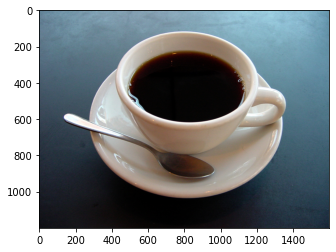

In [ ]:
import matplotlib.pyplot as plt 
from PIL import Image 

img = Image.open('./coffee.jpg')
plt.imshow(img)

In [ ]:
segments_fz = felzenszwalb(img, scale=200)

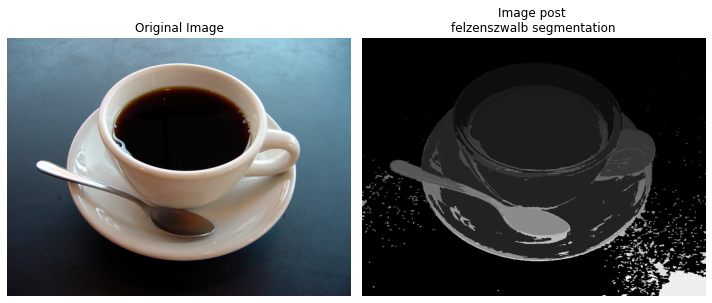

In [ ]:
subplots([img, segments_fz], 
         titles=['Original Image','Image post \nfelzenszwalb segmentation'], 
         figsize=(10,10), 
         nc=2)

In [ ]:
# === SelectiveSearch to generate region proposals === # 

def extract_candidates(img):
    img_lbl, regions = selectivesearch.selective_search(img, scale=200, min_size=100)
    img_area = np.prod(img.shape[:2])
    candidates = []
    for r in regions:
        if r['rect'] in candidates: continue
        if r['size'] < (0.05*img_area): continue
        if r['size'] > (1*img_area): continue
        x, y, w, h = r['rect']
        candidates.append(list(r['rect']))
    return candidates

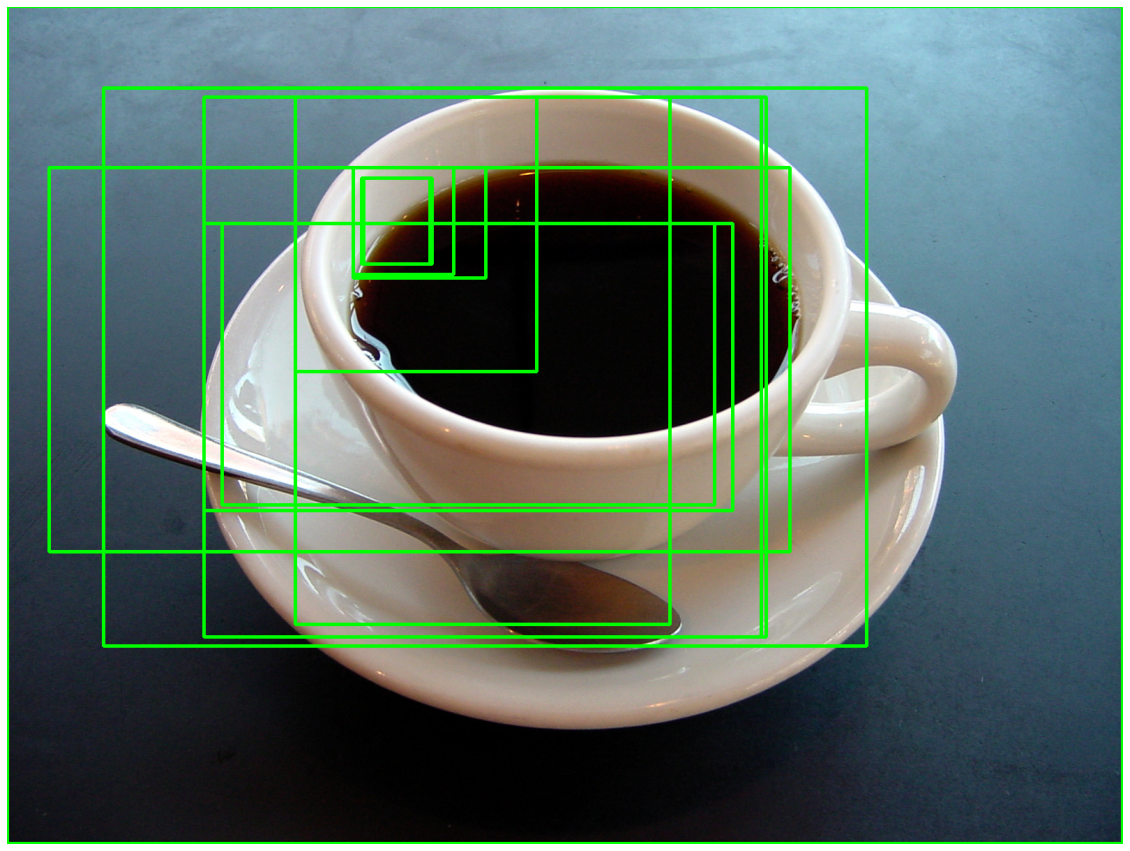

In [ ]:
import numpy as np 

candidates = extract_candidates(np.asarray(img))
show(img, bbs = candidates)

***
# Understanding IoU

In [ ]:
def get_iou(boxA, boxB, epsilon=1e-5):
    # === calculate the coordinates of the intersection box === # 
    x1 = max(boxA[0], boxB[0])
    y1 = max(boxA[1], boxB[1])
    x2 = min(boxA[2], boxB[2])
    y2 = min(boxA[3], boxB[3])

    # === width & height of the overlapping region === # 
    width = (x2 - x1)
    height = (y2 - y1)

    # === area size of overlap === # 
    if (width<0) or (height <0):
        return 0.0
    area_overlap = width * height
    area_a = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1]) # area of boxA
    area_b = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1]) # area of boxB
    area_combined = area_a + area_b - area_overlap # boxA U boxB
    iou = area_overlap / (area_combined+epsilon) # the ratio of the overlapping region 
    return iou

In [ ]:
print(f"Box candidates: {len(candidates)}")
print(img.size)

Box candidates: 86
(1600, 1200)


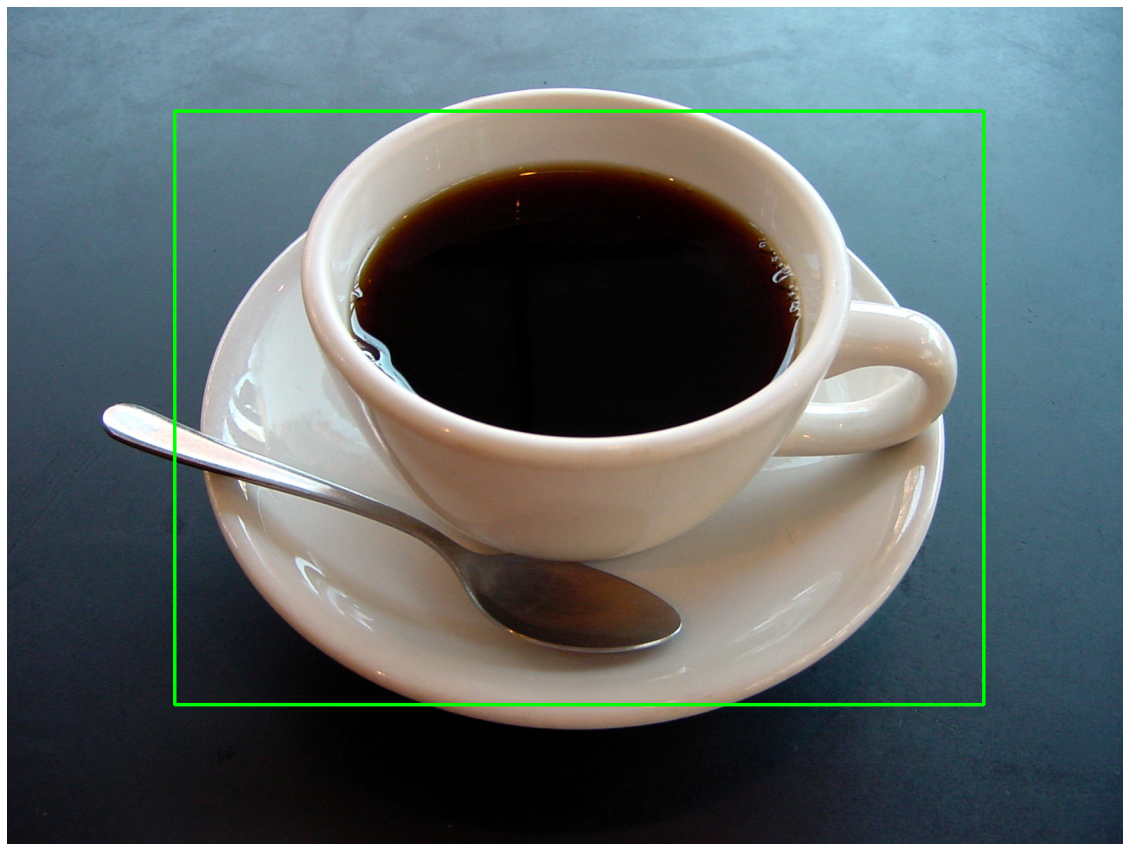

In [ ]:
GT = [240, 150, 1400, 1000]
show(img, bbs = [GT])

In [ ]:
for idx, bbox in enumerate(candidates):
    print(f"IoU over bbox_{idx} = {get_iou(bbox, GT)}")

IoU over bbox_0 = 0.5142914071059096
IoU over bbox_1 = 0.011850912778784474
IoU over bbox_2 = 0.28855780932770225
IoU over bbox_3 = 0.12997824598024033
IoU over bbox_4 = 0.28855780932770225
IoU over bbox_5 = 0.12997824598024033
IoU over bbox_6 = 0.3959859140759277
IoU over bbox_7 = 0.28855780932770225
IoU over bbox_8 = 0.315961460443043
IoU over bbox_9 = 0.012599391480602441
IoU over bbox_10 = 0.012599391480602441
IoU over bbox_11 = 0.600458092969915
IoU over bbox_12 = 0.012599391480602441
IoU over bbox_13 = 0.012599391480602441
IoU over bbox_14 = 0.600458092969915
IoU over bbox_15 = 0.600458092969915
IoU over bbox_16 = 0.600458092969915
IoU over bbox_17 = 0.6056340557956569
IoU over bbox_18 = 0.6056340557956569
IoU over bbox_19 = 0.6056340557956569
IoU over bbox_20 = 0.6056340557956569
IoU over bbox_21 = 0.6056340557956569
IoU over bbox_22 = 0.022344827585980276
IoU over bbox_23 = 0.6056340557956569
IoU over bbox_24 = 0.6056340557956569
IoU over bbox_25 = 0.03044624746419426
IoU over 

IoU over bbox_26=0.6906458080672779, coordinate=[138, 117, 1232, 916]
IoU over bbox_28=0.6906458080672779, coordinate=[138, 117, 1232, 916]
IoU over bbox_29=0.6906458080672779, coordinate=[138, 117, 1232, 916]
IoU over bbox_31=0.6906458080672779, coordinate=[138, 117, 1232, 916]
IoU over bbox_32=0.6906458080672779, coordinate=[138, 117, 1232, 916]
IoU over bbox_33=0.6906458080672779, coordinate=[138, 117, 1232, 916]
IoU over bbox_34=0.6906458080672779, coordinate=[138, 117, 1232, 916]
IoU over bbox_35=0.6906458080672779, coordinate=[138, 117, 1232, 916]
IoU over bbox_36=0.6906458080672779, coordinate=[138, 117, 1232, 916]
IoU over bbox_37=0.6906458080672779, coordinate=[138, 117, 1232, 916]
IoU over bbox_38=0.6906458080672779, coordinate=[138, 117, 1232, 916]
IoU over bbox_39=0.6906458080672779, coordinate=[138, 117, 1232, 916]
IoU over bbox_40=0.6906458080672779, coordinate=[138, 117, 1232, 916]


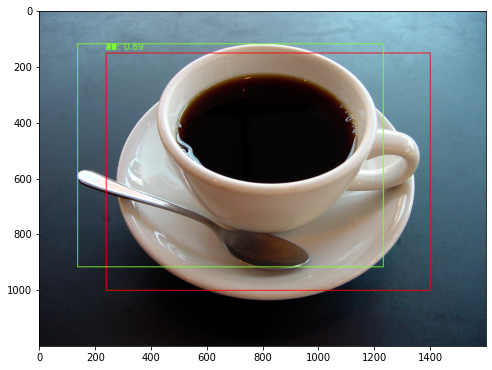

In [ ]:
# (ref) https://junha1125.github.io/blog/artificial-intelligence/2020-08-11-SelectiveSearch/
import matplotlib.pyplot as plt

bbox_color = (125, 255, 51) # (R, G, B)
np_img = np.asarray(img)
cv2.rectangle(np_img, (GT[0], GT[1]), (GT[2], GT[3]), color=(255,0,0), thickness=2)

for idx, bbox in enumerate(candidates):
    iou = get_iou(bbox, GT)
    
    if iou > 0.65: 
        print(f"IoU over bbox_{idx}={iou}, coordinate={bbox}")
        cv2.rectangle(np_img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), color=bbox_color, thickness=2)

        text = f"{idx}: {iou:.2f}"
        cv2.putText(np_img, text, (bbox[0]+100, bbox[1]+20), cv2.FONT_HERSHEY_SIMPLEX, 1, color=bbox_color, thickness=2)

plt.figure(figsize=(8,8))
plt.imshow(np_img)
plt.show()